In [1]:
from pycaret.classification import *


In [2]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [3]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [4]:
target = dataset[['ICU_mortality']]

target.head()

,ICU_mortality
0,0
1,0
2,0
3,0
4,0


In [5]:

dataset = dataset[['age','BMI','APACHEII','trauma','metabolic','gastrointestinal','Sepsis','EN_pro_day0/kg','EN_pro_day1/kg','EN_pro_day2/kg','EN_pro_day3/kg','EN_pro_day4/kg','EN_pro_day5/kg']]
print(dataset.shape)

(976, 13)


In [6]:
dataset.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,72,23.875115,16,0,1,0,1,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,58,32.979592,23,0,1,0,1,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,44,22.857143,0,0,0,1,1,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,71,19.227688,0,0,1,1,0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,60,32.791945,17,1,1,1,0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


# under_sampling

In [7]:
from imblearn.under_sampling import EditedNearestNeighbours
  
#Edited Nearest Neighbours: This algorithm removes any sample which has labels different from those of its adjoining classes.
#pramaters to use:(ratio='auto', return_indices=False, random_state=None, size_ngh=None, n_neighbors=3, kind_sel='all', n_jobs=1)
en = EditedNearestNeighbours()
dataset, target = en.fit_resample(dataset, target)

In [8]:
dataset.shape

(589, 13)

In [9]:

downsampled = pd.concat([dataset, target],axis=1)

# checking counts
downsampled.ICU_mortality.value_counts()

0    354
1    235
Name: ICU_mortality, dtype: int64

In [10]:
downsampled.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg,ICU_mortality
0,58,32.979592,23,0,1,0,1,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000,0
1,71,19.227688,0,0,1,1,0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667,0
2,57,34.717839,26,0,1,0,1,0.496533,0.275733,0.904000,0.811733,0.432533,0.000000,0
3,63,23.374726,16,0,0,0,1,0.785400,1.383591,1.582979,1.065138,1.327454,1.395000,0
4,39,18.730489,0,1,1,0,1,0.515885,0.922515,0.000000,0.000000,0.000000,0.000000,0


In [11]:
data = downsampled
#data_unseen = downsampled.drop(data.index)

# models exploration

In [12]:
from pycaret.classification import *
model_setup = setup(data=data, target='ICU_mortality', data_split_stratify = True)


,Description,Value
0,session_id,5717
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(589, 14)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7162,0.7862,0.5676,0.6730,0.6117,0.3917,0.3976,0.0090
gbc,Gradient Boosting Classifier,0.6603,0.7068,0.5062,0.5842,0.5310,0.2711,0.2791,0.0340
et,Extra Trees Classifier,0.6579,0.6893,0.4684,0.5902,0.5168,0.2590,0.2659,0.0630
rf,Random Forest Classifier,0.6531,0.7074,0.3971,0.6069,0.4691,0.2317,0.2477,0.0730
nb,Naive Bayes,0.6484,0.6857,0.4945,0.5655,0.5222,0.2484,0.2523,0.0060
lightgbm,Light Gradient Boosting Machine,0.6385,0.6953,0.4886,0.5597,0.5066,0.2283,0.2373,0.0260
dt,Decision Tree Classifier,0.6362,0.6193,0.5371,0.5488,0.5383,0.2396,0.2430,0.0060
ada,Ada Boost Classifier,0.6289,0.6427,0.4827,0.5338,0.5021,0.2104,0.2125,0.0300
qda,Quadratic Discriminant Analysis,0.6262,0.6710,0.4871,0.5372,0.5046,0.2076,0.2118,0.0170
lda,Linear Discriminant Analysis,0.6143,0.6438,0.3360,0.5200,0.4024,0.1418,0.1493,0.0160


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


# RF

In [15]:
#for more info: https://pycaret.org/tune-model/
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6190,0.6541,0.4706,0.5333,0.5000,0.1942,0.1952
1,0.5714,0.6518,0.5882,0.4762,0.5263,0.1429,0.1455
2,0.6585,0.7075,0.8125,0.5417,0.6500,0.3417,0.3688
3,0.6341,0.7350,0.5625,0.5294,0.5455,0.2398,0.2401
4,0.7317,0.7575,0.7500,0.6316,0.6857,0.4547,0.4598
5,0.5610,0.5975,0.4375,0.4375,0.4375,0.0775,0.0775
6,0.5366,0.5350,0.5000,0.4211,0.4571,0.0580,0.0587
7,0.6585,0.6725,0.4375,0.5833,0.5000,0.2487,0.2546
8,0.7073,0.7770,0.5882,0.6667,0.6250,0.3865,0.3886
9,0.5366,0.6936,0.7059,0.4615,0.5581,0.1138,0.1253


# ROC

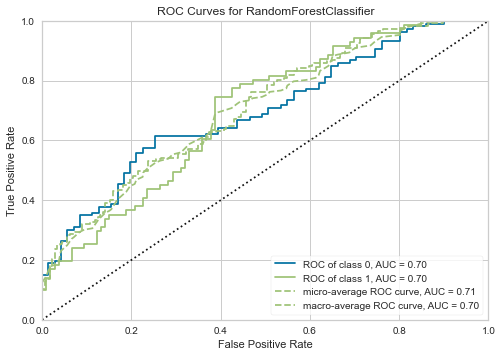

In [16]:
plot_model(tuned_rf, plot = 'auc')

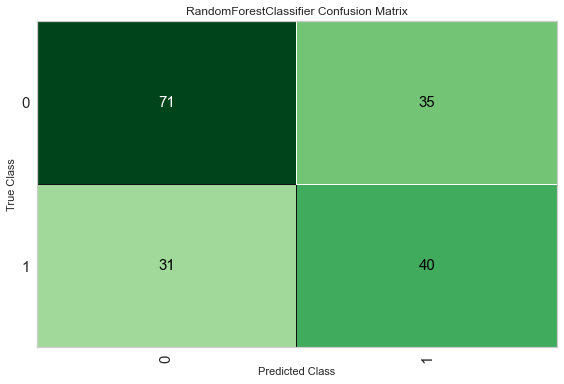

In [17]:
plot_model(tuned_rf, plot = 'confusion_matrix')

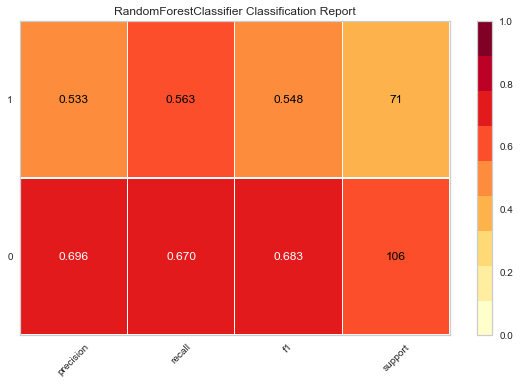

In [18]:
plot_model(tuned_rf, plot = 'class_report')

In [52]:
final_rf = finalize_model(tuned_rf)

predictions =  predict_model(final_rf, data = data_unseen)


saved_rf = save_model(final_rf, 'final-model-rf')

Transformation Pipeline and Model Succesfully Saved


# KNN

In [19]:
#for more info: https://pycaret.org/tune-model/
model = create_model("knn")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7381,0.7259,0.5882,0.7143,0.6452,0.4407,0.4459
1,0.6905,0.7035,0.6471,0.6111,0.6286,0.3636,0.3641
2,0.6829,0.6975,0.5625,0.6000,0.5806,0.3262,0.3266
3,0.5366,0.4888,0.4375,0.4118,0.4242,0.0371,0.0371
4,0.7073,0.7263,0.6250,0.6250,0.6250,0.3850,0.3850
5,0.7317,0.7887,0.5000,0.7273,0.5926,0.4026,0.4184
6,0.5854,0.6550,0.4375,0.4667,0.4516,0.1188,0.1190
7,0.6829,0.7400,0.5625,0.6000,0.5806,0.3262,0.3266
8,0.7073,0.7770,0.4118,0.7778,0.5385,0.3526,0.3909
9,0.6341,0.7255,0.5882,0.5556,0.5714,0.2527,0.2530


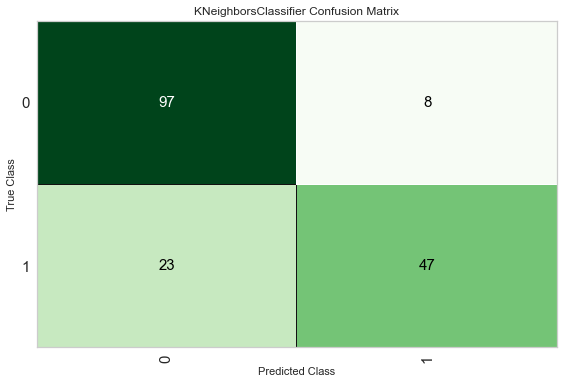

In [17]:
plot_model(tuned_rf, plot = 'confusion_matrix')

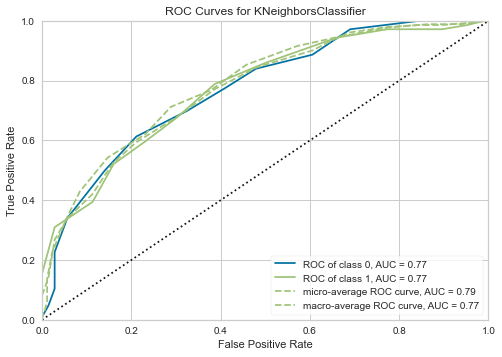

In [20]:
plot_model(tuned_rf, plot = 'auc')